# Get the affine transform from Siemens Mosaic file

In [2]:
import os
from os.path import join
import glob

import nibabel as nib
import dicom
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook


## Load an example volume

<IPython.core.display.Javascript object>


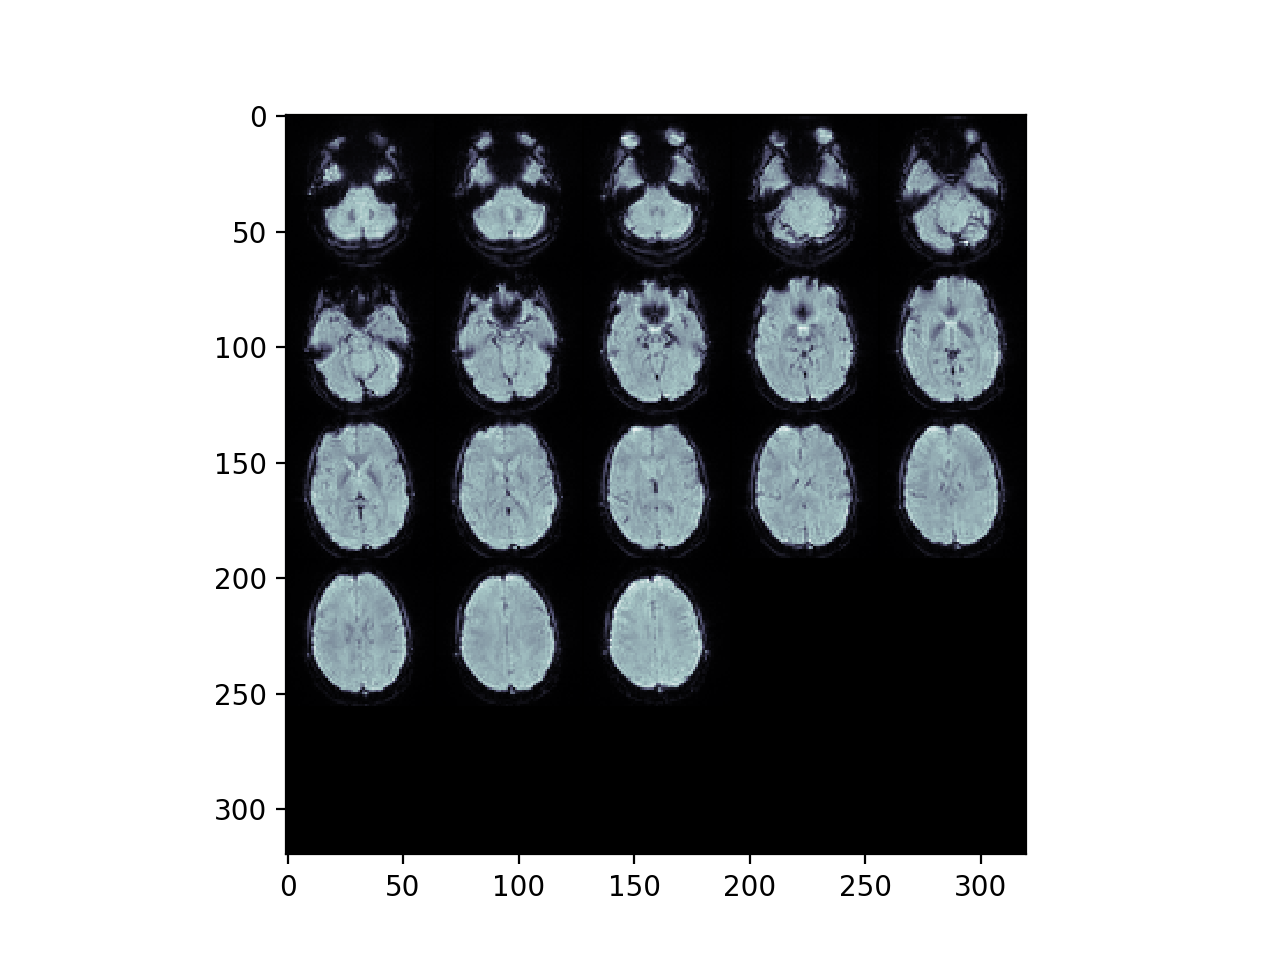

In [27]:
volNum = 1
vol_fname = glob.glob('data/series0013/RESEARCH_YC_171024.MR.PRISMA_HEAD.0013.{:04}.*'.format(volNum))
vol_fname = vol_fname[0]

# read via dicom
dcm = dicom.read_file(vol_fname)

plt.imshow(dcm.pixel_array, cmap='bone')


In [28]:
dcm.MRAcquisitionType

'2D'

In [29]:
dcm.InstanceNumber

'1'

In [4]:
from nibabel.nicom import dicomreaders

In [20]:
# once the dcm object is returned, use the nibabel.nicom.dicomreaders module
# to return a NIFTI object from the mosaic

mos2nii = dicomreaders.mosaic_to_nii(dcm)

In [6]:
mos2nii.affine

array([[   0.        ,   -3.        ,    0.        ,   96.        ],
       [  -2.95971649,    0.        ,   -0.62063863,  120.32533987],
       [  -0.48997788,    0.        ,    3.74897413,  -54.15309012],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

In [7]:
mos2nii.shape

(64, 64, 18)

<IPython.core.display.Javascript object>


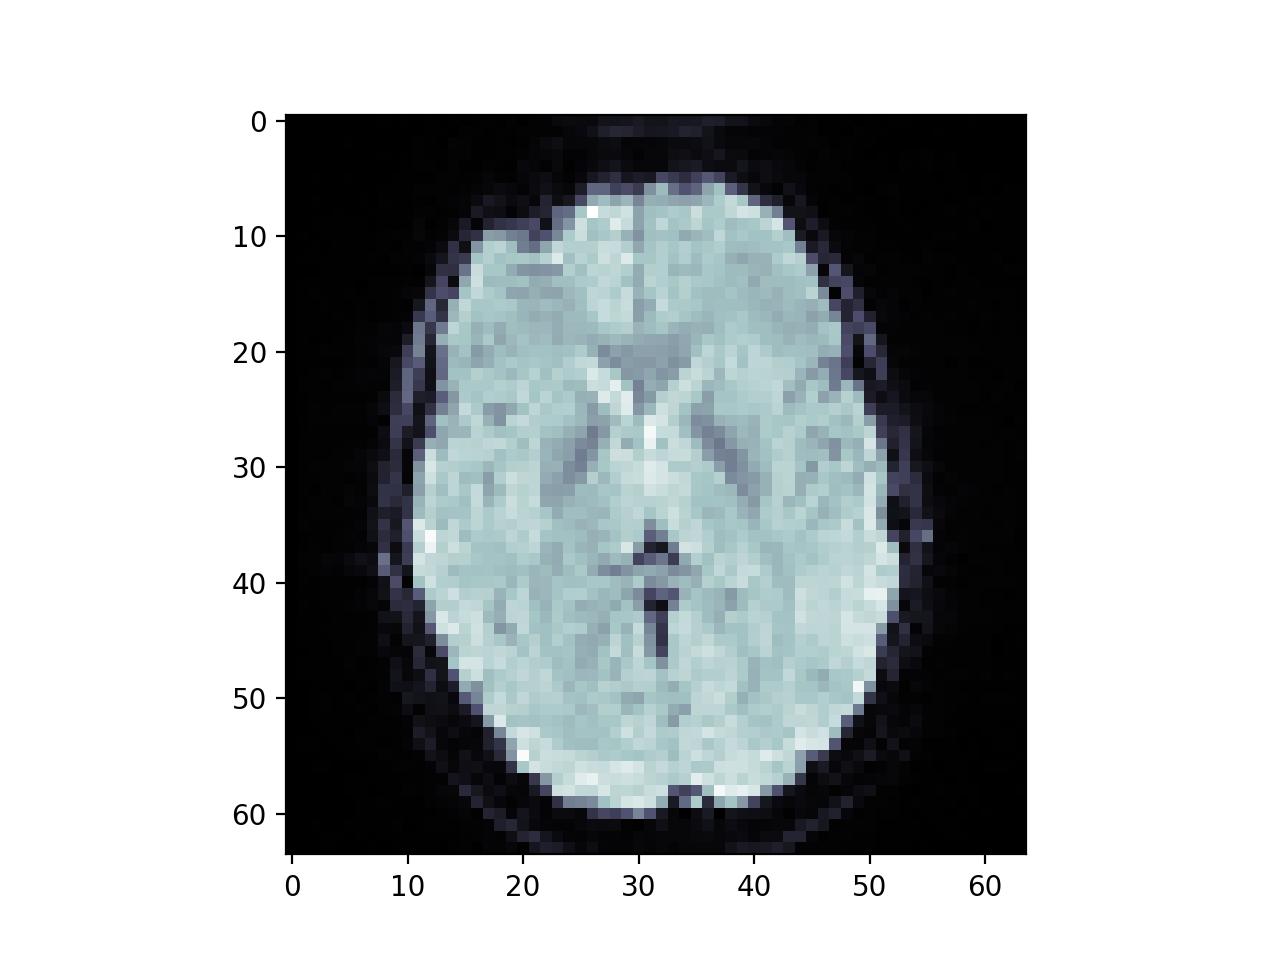

In [8]:
plt.imshow(mos2nii.get_data()[:,:,10], cmap='bone')

In [9]:
nib.aff2axcodes(mos2nii.affine)

('P', 'L', 'S')

Just like with the GE data, we need to reorder the voxel array so that it is in RAS+ format.
Use the nibabel as_closest_canonical() method to accomplish this

In [10]:
mos2nii = nib.as_closest_canonical(mos2nii)

In [11]:
mos2nii.affine

array([[  3.        ,   0.        ,   0.        , -93.        ],
       [  0.        ,   2.95971649,  -0.62063863, -66.13679877],
       [  0.        ,   0.48997788,   3.74897413, -85.02169641],
       [  0.        ,   0.        ,   0.        ,   1.        ]])

<IPython.core.display.Javascript object>


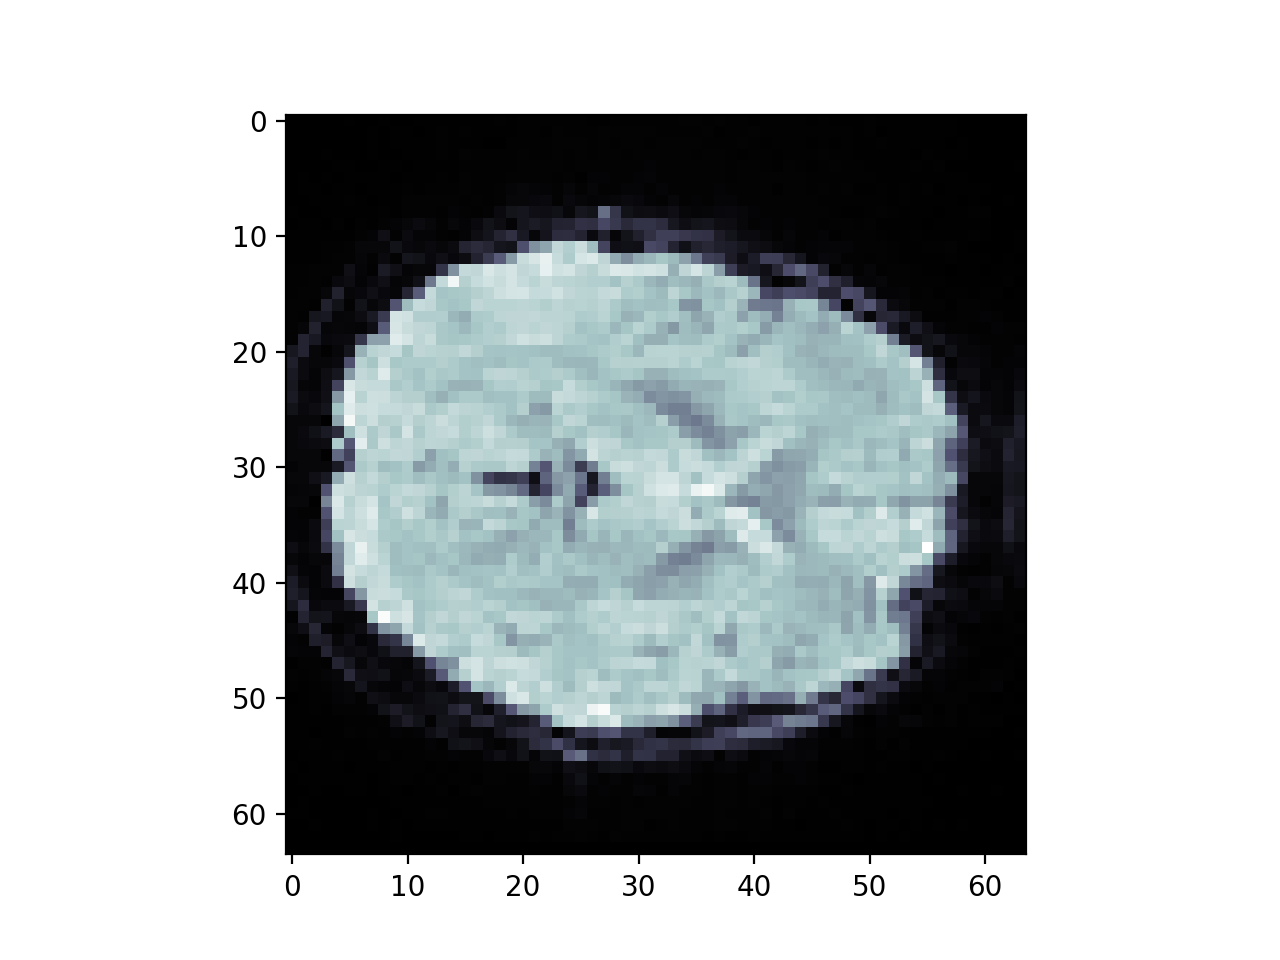

In [12]:
a = mos2nii.get_data()[:,:,10]
plt.imshow(a, cmap='bone')

In [70]:
nib.aff2axcodes(mos2nii.affine)

('R', 'A', 'S')

In [37]:
outputFile = 'mos2nii.nii.gz'
nib.save(mos2nii, outputFile)